# Langkah-Langkah Melakukan Machine Learning
Oleh Afif A. Iskandar

Kita akan mulai "menyelam" pada prinsip-prinsip dasar dari machine learning, dan bagaimana cara mengimplementasikannya via Scikit-Learn API.

### Langkah Umum

- Siapkan Dataset
- Siapkan Metode
    - Import Module
    - Konstruksi
- Train Model
- Consume Model
    - Predict / Transform
    - Evaluasi

## Supervised Learning (Klasifikasi dan Regresi)

Pada **Supervised Learning**, data yang dibutuhkan adalah Fitur pada setiap sampel, dan label yang bersesuaian.

Contoh supervised learning:
- Diberikan data riwayat applicants kartu kredit beserta hasilnya (diterima atau tidak) untuk membuat model apakah pendaftar kartu kredit dimasa depan akan diterima aplikasinya atau tidak (klasifikasi)
- Diberikan data riwayat harga rumah dari tahun ke tahun di kompleks X untuk membuat model harga rumah dimasa depan (regresi)

### Contoh Klasifikasi

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Siapkan Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Siapkan Metode Klasifikasi
model = KNeighborsClassifier()

# Train Model
model.fit(X, y)

# Consume Model
new_data = [0,1,1,0]
res = model.predict([new_data])
print(iris.target_names[res])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


['setosa']


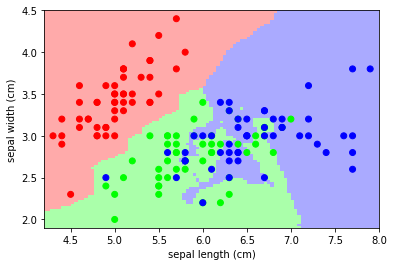

In [3]:
from fig_code import plot_iris_knn
plot_iris_knn()

### Contoh Regresi

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(0)
# Siapkan Dataset
X = np.random.random(size=(20, 1))
y = 3*X.squeeze() + 2 + np.random.randn(20)

# Siapkan Metode Regresi
model = LinearRegression()

# Train Model
model.fit(X,y)

# Consume Model
X_fit = np.linspace(0,1,100)[:, np.newaxis]
y_fit = model.predict(X_fit)

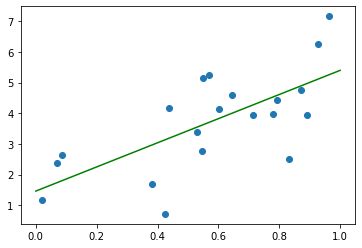

In [10]:
plt.scatter(X,y);
plt.plot(X_fit.squeeze(), y_fit, color='green');

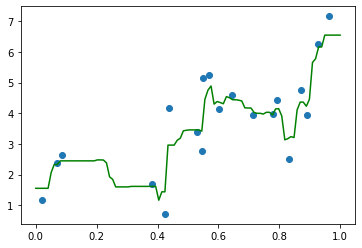

In [11]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
# Siapkan Dataset
X = np.random.random(size=(20, 1))
y = 3*X.squeeze() + 2 + np.random.randn(20)

# Siapkan Metode Regresi
model = RandomForestRegressor()

# Train Model
model.fit(X,y)

# Consume Model
X_fit = np.linspace(0,1,100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.scatter(X,y);
plt.plot(X_fit.squeeze(), y_fit, color='green');

## Unsupervised Learning: Reduksi Dimensi dan Pengelompokan (Clustering)

Pada **Unupervised Learning**, data yang dibutuhkan hanya Fitur pada setiap sampel saja (tanpa label.

Contoh Unsupervised learning:
- Diberikan data kumpulan berita hari ini, tentukanlah berita paling penting pada hari itu (Reduksi Dimensi)
- Diberikan data mahasiswa suatu Universitas, kelompokkan sesuai dengan kemampuan finansial untuk distribusi beasiswa (Clustering)

### Reduksi Dimensi : PCA

In [18]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Siapkan Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Siapkan Metode Reduksi Dimensi
model = PCA(n_components=2)

# Train Model
model.fit(X)

# Consume Model
X_red = model.transform(X)

Arti dari 2 componen:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


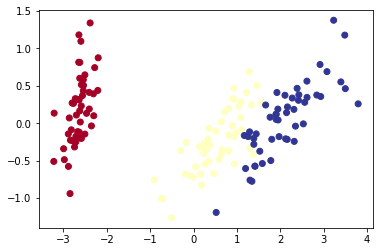

In [19]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=y,
           cmap='RdYlBu')

print("Arti dari 2 componen:")
for component in model.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

### Clustering : K-Means

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Siapkan Dataset
iris = load_iris()
X, y = iris.data, iris.target

# Siapkan Metode Klasifikasi
model = KMeans(n_clusters=3)

# Train Model
model.fit(X)

# Consume Model
pred = model.predict(X)

In [22]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

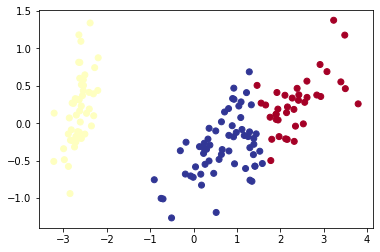

In [26]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=pred,
           cmap='RdYlBu');

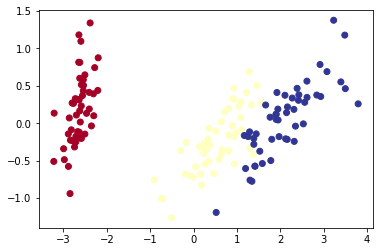

In [27]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=y,
           cmap='RdYlBu')